In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [27]:
sj_lab = pd.read_excel('SanJuan_all.xlsx') #, index = 'Unnamed: 0')
iq_lab = pd.read_excel('Iquitos_all.xlsx') #, index = 'Unnamed: 0')
subm = pd.read_csv('submission_format.csv')

In [30]:
'''
sj_lab.columns = ['time', 'total_cases']
iq_lab.columns = ['time', 'total_cases']

sj_lab = sj_lab.set_index('time')
iq_lab = iq_lab.set_index('time')
#sj_lab = sj_lab.drop('time', axis = 1)
#sj_lab = iq_lab.drop('time', axis = 1)
'''

#sj_lab = sj_lab.total_cases.dropna()
#iq_lab = iq_lab.total_cases.dropna()

sj_lab = sj_lab[['Unnamed: 0', 'total_cases']].dropna(axis = 0).set_index('Unnamed: 0')
iq_lab = iq_lab[['Unnamed: 0', 'total_cases']].dropna(axis = 0).set_index('Unnamed: 0')

In [32]:
sj_lab_train = sj_lab[sj_lab.index.year < 2004]
sj_lab_test = sj_lab[sj_lab.index.year > 2003]
iq_lab_train = iq_lab[iq_lab.index.year < 2008]
iq_lab_test = iq_lab[iq_lab.index.year > 2007]

In [17]:
sj_len = subm[subm.city=='sj'].shape[0]
iq_len = subm[subm.city=='iq'].shape[0]

In [58]:
def loop_predict(series, length, p, d, q):
    temp_s = series.copy()
    results = []
    for i in range(length):
        model = ARIMA(temp_s, order = (p,d,q))
        pred = model.fit().forecast(steps = 1)[0][0]
        #pred = int(round(model.fit().forecast(steps = 1)[0][0]))
        results.append(int(round(pred)))
        temp_s = np.hstack([temp_s[1:], pred])
        #print(pred)
    return results

In [18]:
# San Juan
sj_np = sj_lab.total_cases.values
sj_result = loop_predict(sj_np, sj_len, 1,1,1)

AttributeError: 'Series' object has no attribute 'total_cases'

In [7]:
# Iquitos
iq_np = iq_lab.total_cases.values
iq_result = loop_predict(iq_np, iq_len, 1,1,1)

/Users/pasin/opt/anaconda3/envs/env01/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [8]:
sum_result = [int(round(x)) for x in np.hstack([sj_result, iq_result])]
subm.total_cases = sum_result
#subm.to_csv('for_loop_arima2.csv', index = False)

In [33]:
sj_lab_train

,total_cases
Unnamed: 0,
1990-04-30,4.0
1990-05-07,5.0
1990-05-14,4.0
1990-05-21,3.0
1990-05-28,6.0
...,...
2003-11-26,37.0
2003-12-03,29.0
2003-12-10,26.0


In [59]:
sj_result = loop_predict(sj_lab_train.values.reshape(-1), sj_lab_test.shape[0], 1,1,0)

In [60]:
sj_result

[23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,


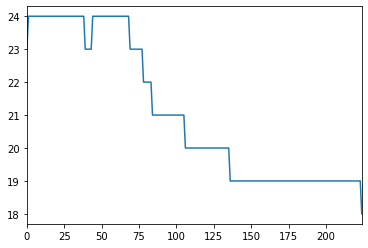

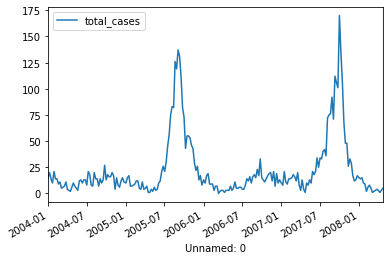

In [63]:
pd.Series(sj_result).plot()
sj_lab_test.plot()